distx = Exponential(1) = Exponential{Float64}(θ=1.0)
disty = Exponential(2) - 1 = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -1.0
σ: 1.0
ρ: Exponential{Float64}(θ=2.0)
)

m = 20
n = 30
Niters = 1000000


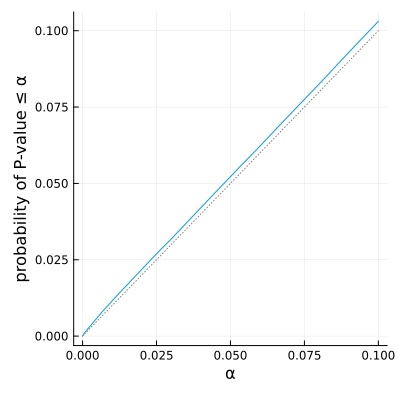

In [1]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

@show distx = Exponential(1)
@show disty = Exponential(2) - 1
m, n = 20, 30
Niters = 10^6
@show m n Niters
pval = [pvalue(UnequalVarianceTTest(rand(distx, m), rand(disty, n))) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Bernoulli(0.3) = Bernoulli{Float64}(p=0.3)
disty = Bernoulli(0.3) = Bernoulli{Float64}(p=0.3)
m = 20
n = 30
Niters = 1000000


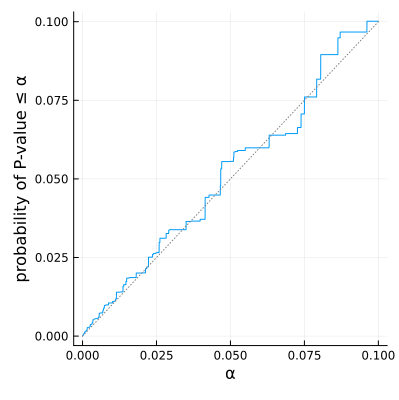

In [2]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

@show distx = Bernoulli(0.3)
@show disty = Bernoulli(0.3)
m, n = 20, 30
Niters = 10^6
@show m n Niters
pval = [pvalue(UnequalVarianceTTest(rand(distx, m), rand(disty, n))) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


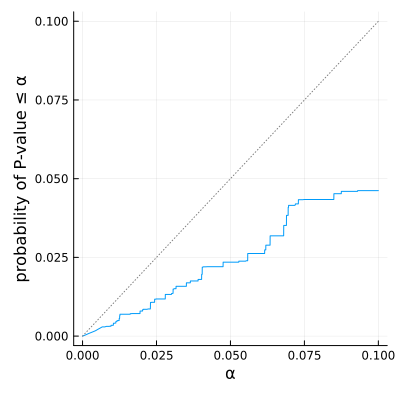

In [3]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
pval1 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(FisherExactTest(a, b, c, d); method=:central)
        ) for _ in 1:Niters]
plot(α -> ecdf(pval1, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


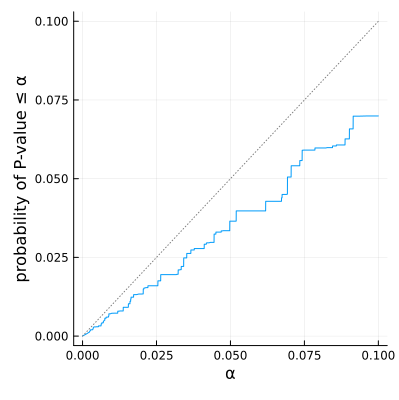

In [4]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
pval2 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(FisherExactTest(a, b, c, d); method=:minlike)
        ) for _ in 1:Niters]
plot(α -> ecdf(pval2, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000
  5.020407 seconds (8.36 M allocations: 2.428 GiB, 6.73% gc time, 43.35% compilation time)


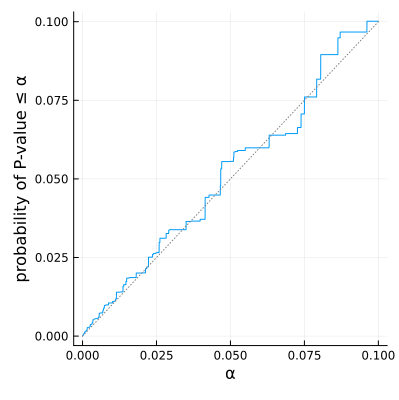

In [5]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
@time pval3 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(ChisqTest([a b; c d]))
        ) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, 0.3) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, 0.3) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000
  1.131729 seconds (2.45 M allocations: 186.061 MiB, 6.20% gc time, 85.53% compilation time)


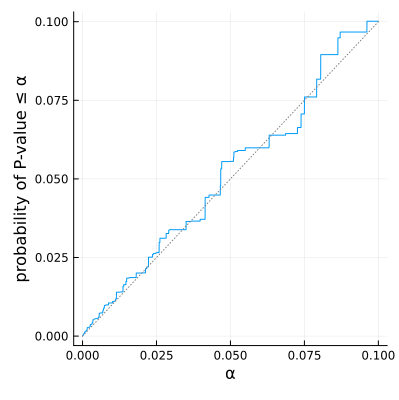

In [6]:
using Distributions
using HypothesisTests
using StaticArrays
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

m, n = 20, 30
@show distx = Binomial(m, 0.3)
@show disty = Binomial(n, 0.3)
Niters = 10^5
@show Niters
@time pval3 = [(
            a = rand(distx); b = m - a;
            c = rand(disty); d = n - c;
            pvalue(ChisqTest(@SMatrix [a b; c d]))
        ) for _ in 1:Niters]
plot(α -> ecdf(pval, α), 0, 0.1; label="")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

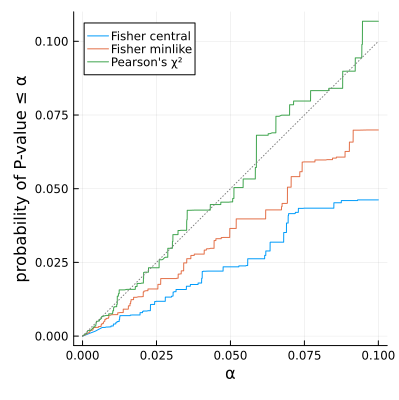

In [7]:
plot(α -> ecdf(pval1, α), 0, 0.1; label="Fisher central")
plot!(α -> ecdf(pval2, α); label="Fisher minlike")
plot!(α -> ecdf(pval3, α); label="Pearson's χ²")
plot!(identity; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α", size=(400, 400))

distx = Binomial(m, p) = Binomial{Float64}(n=20, p=0.3)
disty = Binomial(n, q) = Binomial{Float64}(n=30, p=0.3)
Niters = 100000


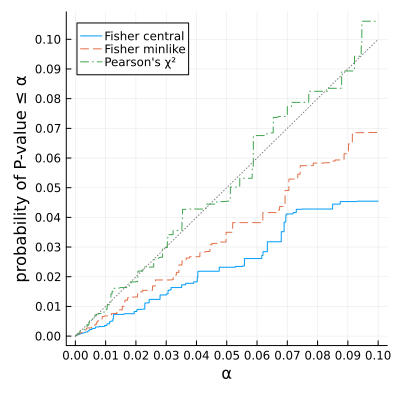

In [8]:
using Distributions
using HypothesisTests
using StaticArrays
using StatsPlots
default(fmt=:png)
ecdf(A, x) = count(≤(x), A)/length(A)

function plot_sim(; m=20, n=30, p=0.3, q=0.3, Niters=10^5, ytick=0:0.01:1, kwargs...)
    @show distx = Binomial(m, p)
    @show disty = Binomial(n, q)
    @show Niters
    pval1 = zeros(Niters)
    pval2 = zeros(Niters)
    pval3 = zeros(Niters)
    for i in 1:Niters
        a = rand(distx)
        b = m - a
        c = rand(disty)
        d = n - c
        pval1[i] = pvalue(FisherExactTest(a, b, c, d); method=:central)
        pval2[i] = pvalue(FisherExactTest(a, b, c, d); method=:minlike)
        pval3[i] = pvalue(ChisqTest(@SMatrix [a b; c d]))
    end
    plot(α -> ecdf(pval1, α), 0, 0.1; label="Fisher central")
    plot!(α -> ecdf(pval2, α); label="Fisher minlike", ls=:dash)
    plot!(α -> ecdf(pval3, α); label="Pearson's χ²", ls=:dashdot)
    plot!(identity; label="", ls=:dot, c=:gray)
    plot!(; xguide="α", yguide="probability of P-value ≤ α")
    plot!(; xtick=0:0.01:1, ytick)
    plot!(; size=(400, 400), kwargs...)
end

plot_sim(; m=20, n=30, p=0.3, q=0.3)

distx = Binomial(m, p) = Binomial{Float64}(n=20, p=0.2)
disty = Binomial(n, q) = Binomial{Float64}(n=30, p=0.5)
Niters = 100000


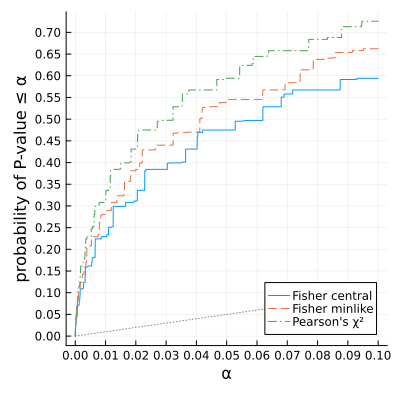

In [9]:
plot_sim(; m=20, n=30, p=0.2, q=0.5, ytick=0:0.05:1, legend=:bottomright)